In [1]:
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch
from pylab import *

import plotnine
from plotnine import *

dpi = 300

In [2]:
from imp import load_source
nanospot=load_source('nanospot', '/home/jovyan/python/Nanospot/nanospot/nanospot.py')

### Figure 5A


In [3]:
df_dotplot = pd.read_csv("../data/fig5_pathology_case300_Z-scoreCelltypeAbundance_PercentageROI.csv", sep = ",", index_col = 0)
cell_state_cluster_order = df_dotplot.Celltype.unique()[np.sort(df_dotplot.cell_state_dendrogram_index.unique())]

break_after_cell = ["Neutrophil.2", "EP.Secretory.3", "M2.3", "EC.Venous", "M2.5", "M2.2"]
cell_state_cluster_order = np.insert(cell_state_cluster_order, [int(np.where(cell_state_cluster_order == cell)[0] + 1) for cell in break_after_cell], " ") 

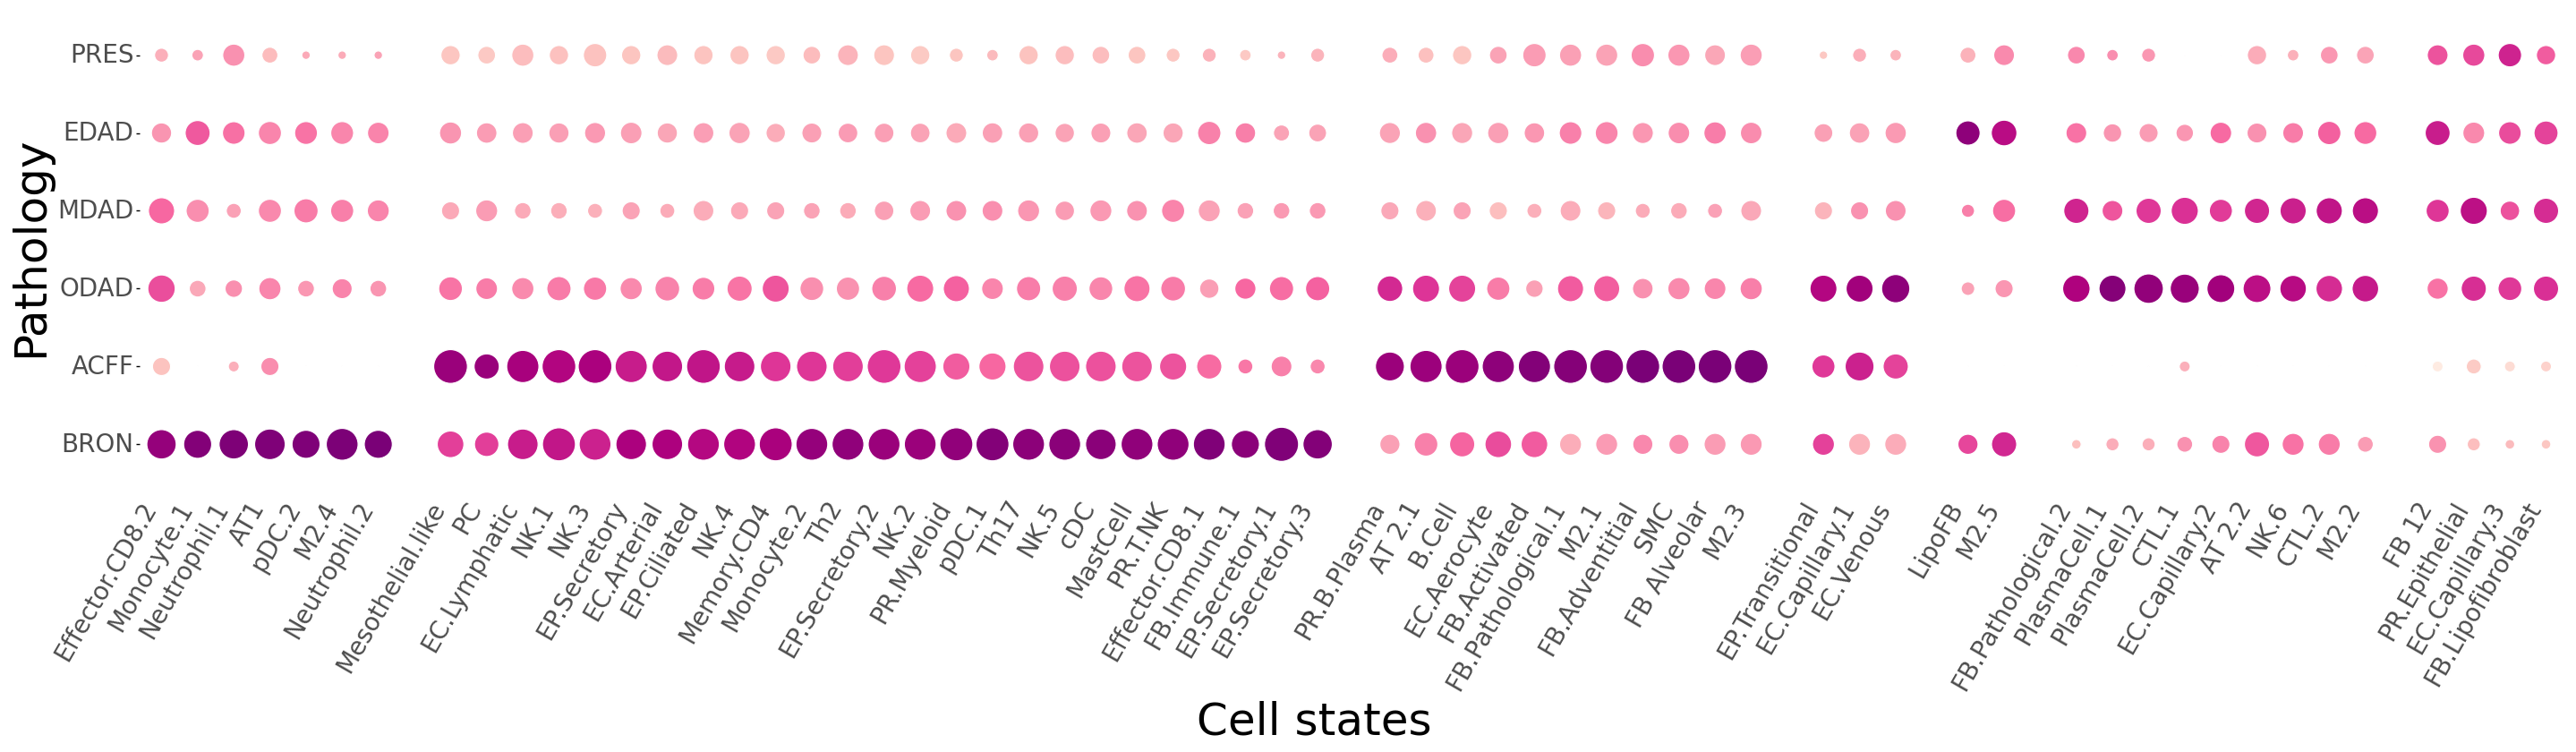

<ggplot: (8776901023485)>

In [4]:
plotnine.options.figure_size=(35,7)
plotnine.dpi = dpi

p1 = (
    ggplot() + 
    geom_point(data = df_dotplot, mapping = aes(x = "Celltype", y = "Background", fill = "value", size = "Percentage_roi_thresMean"), colour = "white") +
    theme_bw() +
    theme(axis_text_x = element_text(angle = 60, vjust = 1, hjust=1, size=20), 
          axis_text_y = element_text(size=20),
          axis_title_x = element_text(size=36), 
          axis_title_y = element_text(size=36),
          axis_ticks_major_x = element_blank(),
          panel_grid_major_x = element_blank(),
          panel_grid_major_y = element_blank(),
#           strip_background_x= element_blank(),
#           strip_text_x = element_text(size = 20),
          panel_border = element_blank(),
          panel_spacing_x = .5,
          panel_spacing_y = .2,
          legend_position = "none" ) +
    scale_size_continuous(range=[0,15]) + 
    scale_fill_distiller(palette = "RdPu", direction = 1) +
    scale_x_discrete(limits = cell_state_cluster_order) +
    scale_y_discrete(limits = ["PRES", "EDAD", "MDAD", "ODAD", "ACFF", "BRON"][::-1]) +
    ylab("Pathology") + xlab("Cell states")

)

p1

### Figure 5B

In [5]:
case = 300 ## Finalise this bit afterwards
result_path='/lustre/scratch117/cellgen/team283/tl7/project/nanostring-covid/data/SpaceJam/LungAtlas_model/results/20220411_SpaceJam_UKCIC33Donor/LocationModelWTAMultiExperimentHierarchicalGeneLevel_'

if case == 100:
    # PRES and ACFF
    result_directory='26experiments_62clusters_141locations_10276genes_33DonorPRESEDADACFFgeneE-6_cellE6/'
    sp_adata=sc.read_h5ad(f"{result_path}{result_directory}sp.h5ad")

    # DADs and BRON
    result_directory='20experiments_62clusters_92locations_10276genes_33DonorNoPRESEDADACFFgeneE-6_cellE6/'

elif case == 200:
    result_directory='23experiments_62clusters_94locations_10276genes_PRESPRES-likeACFF_cell1e6/'
    sp_adata=sc.read_h5ad(f"{result_path}{result_directory}sp.h5ad")

    result_directory='28experiments_62clusters_139locations_10276genes_MDADODAD-likeODADBRON_cell1e6/'

elif case == 300:
    result_directory='23experiments_62clusters_94locations_10276genes_new_PRESPRES-likeACFF_cell1e6/'
    sp_adata=sc.read_h5ad(f"{result_path}{result_directory}sp.h5ad")

    result_directory='28experiments_62clusters_139locations_10276genes_new_MDADODAD-likeODADBRON_cell1e6/'
    
    
sp_adata=sp_adata.concatenate(sc.read_h5ad(f"{result_path}{result_directory}sp.h5ad"))
sp_adata.obs['area mm2']=np.array(sp_adata.obs['area'] * 1e-6, dtype='float32')

abundance_df=nanospot.plot_C2L_results()

[abundance_df.create_scatter_df(sp_adata[sp_adata.obs.Pathology == patho_gp], background=patho_gp) for patho_gp in ["PRES", "EDAD", "MDAD", "ODAD", "ACFF", "BRON"]]

/software/team283/tl7/conda_env/spacejam/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[None, None, None, None, None, None]

In [6]:
cell_abbreviations=pd.read_csv("/home/jovyan/projects/nanostring-covid/data/cell_altname_v1.csv", index_col=0, sep=',')
cell_abbreviations.index = cell_abbreviations.cell_states

cell_abbreviations=cell_abbreviations['alt_name'].to_dict()

abundance_df.abundance_df["Celltype"] = [cell_abbreviations.get(cell) for cell in abundance_df.abundance_df.Celltype]


In [7]:
abundance_df.plot_scatter( col_wrap = 5,  palette=[ "#3A3A98", "#832424"], set_ylabels="Abundance", dpi = dpi )

/software/team283/tl7/conda_env/spacejam/lib/python3.7/site-packages/plotnine/facets/facet.py:393: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


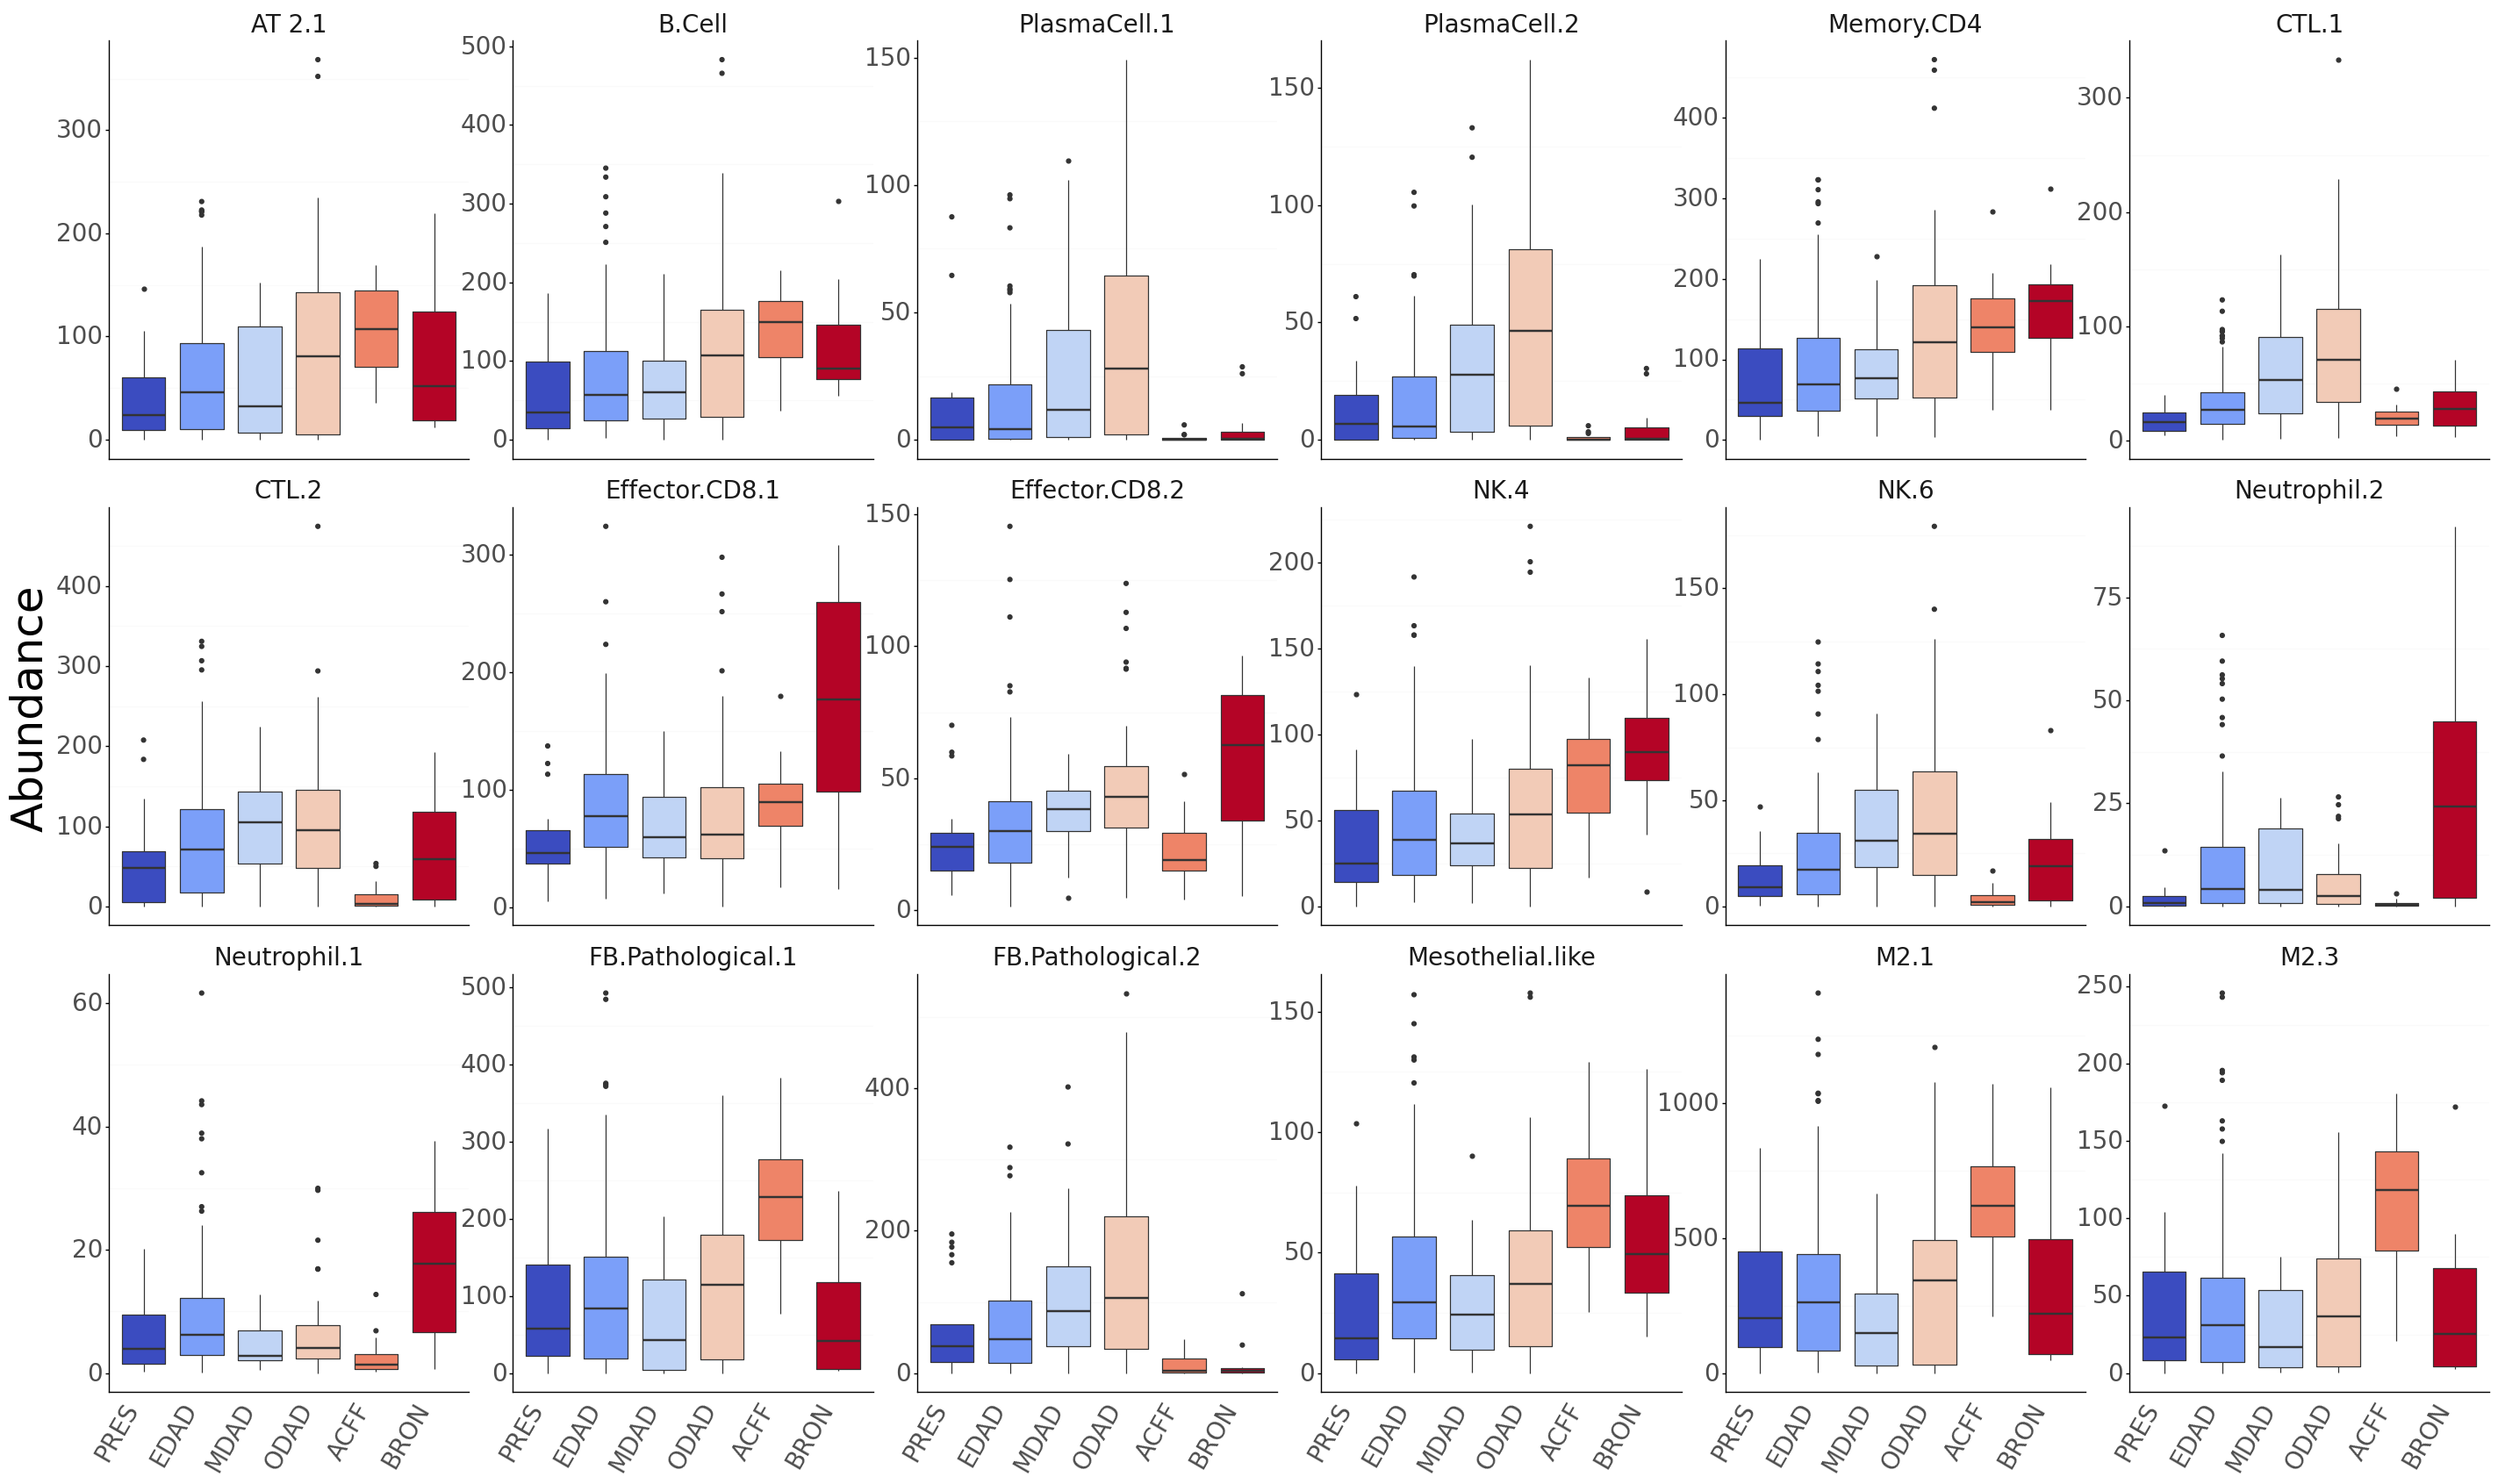

<ggplot: (8776615348093)>

In [8]:
plotnine.options.figure_size=(35,20)
plotnine.dpi = dpi

select_cell_type = ["AT 2.1", "EC." "Neutrophil", "B.Cell", "PlasmaCell", "CD4", "CTL.1", "CTL.2", "CD8", "NK.4", "NK.6", "Neutrophil", "Pathological.1", "Pathological.2", "Mesothelial", "M2.1", "M2.3"]

plot_abundance_celltype = pd.DataFrame()

for cell_type in select_cell_type:
    plot_abundance_celltype = plot_abundance_celltype.append( abundance_df.abundance_df[ [ cell_type in c for c in abundance_df.abundance_df.Celltype ] ] )

plot_abundance_celltype.Celltype = pd.Categorical(plot_abundance_celltype.Celltype, ordered=True, categories=plot_abundance_celltype.Celltype.unique() )
    
p2 = (
    ggplot() + 
    geom_boxplot(data = plot_abundance_celltype, mapping = aes(x = "Background", y = "Abundance", fill = "Background") ) + 
    theme_bw() +
    theme(axis_text_x = element_text(angle = 60, vjust = 1, hjust=1, size=20),  
          axis_text_y = element_text(size=20),
          axis_title_x = element_blank(), 
          axis_title_y = element_text(size=36),
          axis_ticks_major_x = element_blank(),
          panel_grid_major_x = element_blank(),
          panel_grid_major_y = element_blank(),
          strip_background_x= element_blank(),
          strip_text_x=element_text(size = 20),
          panel_border = element_blank(),
          panel_spacing_x = .5,
          panel_spacing_y = .2,
          axis_line_x = element_line(),
          axis_line_y = element_line(),
          legend_position = "none" ) + 
    scale_x_discrete(limits = ["PRES", "EDAD", "MDAD", "ODAD", "ACFF", "BRON"]) +
    scale_fill_manual(breaks = ["PRES", "EDAD", "MDAD", "ODAD", "ACFF", "BRON"], values = [mpl.colors.rgb2hex(cm.get_cmap('coolwarm', 6)(c)) for c in range(6) ]) +
    facet_wrap(facets="~Celltype", scales="free_y", nrow = 3)  
)

p2